In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

import seaborn as sns

In [2]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [3]:
#purchase_data.info()

In [4]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)


In [6]:
hotel = pd.read_csv('Resources/hotel_bookings.csv', usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

In [8]:
hotel_eda = hotel['hotel'].value_counts()

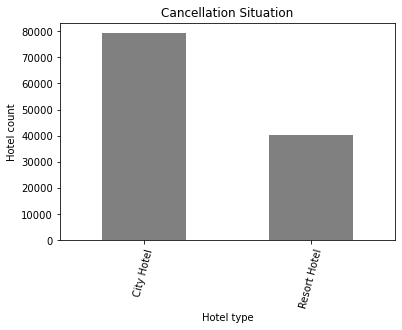

In [9]:
#Cancellations City hotel vs. Resort:
cancel_plot = hotel_eda.plot(kind='bar', rot=75, color = "grey", title="Cancellation Situation")
cancel_plot.set_xlabel("Hotel type")
cancel_plot.set_ylabel("Hotel count")
plt.show()

-City Hotel has the highest cancellation rate

In [11]:
hotel_eda = hotel.copy()
hotel_eda['hotel'].value_counts()
hotel_eda['is_canceled'].value_counts()/hotel.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

37% of reservations were canceled